<a href="https://colab.research.google.com/github/segravjf/nba_player_similarity/blob/main/bruce_brown_best_subs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who could the Nuggets pursue to replace Bruce Brown?

This notebook builds on work to identify similar players to Bruce Brown, the sixth man for the 2022-23 NBA Champion Denver Nuggets, who is due to (rightfully) get a bag with another team after contributing meaningfully to the Nuggets' title run.

We'll first import the similarity scores from the previous notebook, import some player contract data and other stats, subset the similarity scores to available players in 2024 for Denver, and complete some analysis to find a suitable list of somewhat substitutes.

In [1]:
## Import commonly-used modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat

In [2]:
## Import similarity scores
import io
from google.colab import files
uploaded = files.upload()

sims_raw = pd.read_csv(io.BytesIO(uploaded['bruce_brown_similar_players.csv']))
contracts_raw = pd.read_csv(io.BytesIO(uploaded['NBA_2023_contracts.csv']))
adv_raw = pd.read_csv(io.BytesIO(uploaded['NBA_2023_advanced.csv']))

Saving bruce_brown_similar_players.csv to bruce_brown_similar_players.csv
Saving NBA_2023_advanced.csv to NBA_2023_advanced.csv
Saving NBA_2023_contracts.csv to NBA_2023_contracts.csv


In [3]:
## Peek at the raw data for similar players to BB
sims_raw.head()

,Player,Tm,Pos,USG%,3PAr,TOV%,BLK%,TRB%,STL%,FGA,FTA,PTS,PCT_FG_3P,CORNER_PCT_3PA,PCT_AST_2P,PCT_AST_3P,PCT_FG_0-3,DUNK_%FGA,Similarity
0,Bruce Brown,DEN,SF,17.8,0.343,13.2,2.0,8.3,1.9,15.9,3.3,19.8,0.343,0.398,0.551,0.923,0.266,0.076,1.000000
1,Jaden McDaniels,MIN,SF,15.8,0.376,12.6,2.7,7.1,1.5,14.1,2.8,18.7,0.376,0.506,0.658,0.991,0.288,0.115,0.921820
2,Jalen McDaniels,PHI,SF,17.2,0.376,12.1,1.6,9.9,2.1,15.5,3.5,18.9,0.376,0.392,0.578,0.974,0.316,0.076,0.921409
3,Christian Braun,DEN,SG,13.0,0.332,9.9,1.3,8.8,1.7,12.0,2.7,14.9,0.332,0.417,0.670,0.941,0.360,0.114,0.886224
4,Terance Mann,LAC,SG,15.3,0.378,12.2,1.0,8.3,1.1,13.7,3.1,18.7,0.378,0.495,0.554,0.883,0.330,0.107,0.884022


In [4]:
## Put BB in his own df
bb = sims_raw.iloc[0,]

bb

Player            Bruce Brown
Tm                        DEN
Pos                        SF
USG%                     17.8
3PAr                    0.343
TOV%                     13.2
BLK%                      2.0
TRB%                      8.3
STL%                      1.9
FGA                      15.9
FTA                       3.3
PTS                      19.8
PCT_FG_3P               0.343
CORNER_PCT_3PA          0.398
PCT_AST_2P              0.551
PCT_AST_3P              0.923
PCT_FG_0-3              0.266
DUNK_%FGA               0.076
Similarity                1.0
Name: 0, dtype: object

In [22]:
## And then remove him from the sims dataset
sims = sims_raw.iloc[1:,]

print(sims.shape)
sims.head()

(319, 19)


,Player,Tm,Pos,USG%,3PAr,TOV%,BLK%,TRB%,STL%,FGA,FTA,PTS,PCT_FG_3P,CORNER_PCT_3PA,PCT_AST_2P,PCT_AST_3P,PCT_FG_0-3,DUNK_%FGA,Similarity
1,Jaden McDaniels,MIN,SF,15.8,0.376,12.6,2.7,7.1,1.5,14.1,2.8,18.7,0.376,0.506,0.658,0.991,0.288,0.115,0.921820
2,Jalen McDaniels,PHI,SF,17.2,0.376,12.1,1.6,9.9,2.1,15.5,3.5,18.9,0.376,0.392,0.578,0.974,0.316,0.076,0.921409
3,Christian Braun,DEN,SG,13.0,0.332,9.9,1.3,8.8,1.7,12.0,2.7,14.9,0.332,0.417,0.670,0.941,0.360,0.114,0.886224
4,Terance Mann,LAC,SG,15.3,0.378,12.2,1.0,8.3,1.1,13.7,3.1,18.7,0.378,0.495,0.554,0.883,0.330,0.107,0.884022
5,Hamidou Diallo,DET,SF,21.8,0.056,13.9,1.4,10.8,2.6,18.2,7.2,25.4,0.056,0.524,0.643,1.000,0.443,0.139,0.876340


In [6]:
## Peek at 2024 data
contracts_raw.head()

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
0,1,Stephen Curry,GSW,$48070014,$51915615,$55761216,$59606817,NaN,NaN,$215353662,curryst01
1,2,Russell Westbrook,UTA,$47559433,NaN,NaN,NaN,NaN,NaN,$47063478,westbru01
2,3,LeBron James,LAL,$44474988,$53369986,$57639585,NaN,NaN,NaN,$97844974,jamesle01
3,4,Kevin Durant,PHO,$44119845,$47649433,$51179021,$54708609,NaN,NaN,$197656908,duranke01
4,5,Bradley Beal,WAS,$43279250,$46741590,$50203930,$53666270,$57128610,NaN,$43279250,bealbr01


In [7]:
## Look at BB
contracts_raw[contracts_raw['Player'] == 'Bruce Brown']

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
200,201,Bruce Brown,DEN,$6479000,$6802950,NaN,NaN,NaN,NaN,$6479000,brownbr01


One weakness with this data is that we don't have any markings for Player Options, which Bruce is an example. He is technically "on contract" for 2023-24, but he has the ability to opt out of it with his option to sign a bigger contract.

In [8]:
## Get rid of the pesky $ from all of the columns in this dataset
contracts = contracts_raw.copy()
for col in contracts.columns:
  if "20" in col or "Guar" in col:
    contracts[col] = contracts[col].str.replace('\$','',regex=True).astype('Int64')

contracts.head()

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
0,1,Stephen Curry,GSW,48070014,51915615,55761216,59606817,<NA>,<NA>,215353662,curryst01
1,2,Russell Westbrook,UTA,47559433,<NA>,<NA>,<NA>,<NA>,<NA>,47063478,westbru01
2,3,LeBron James,LAL,44474988,53369986,57639585,<NA>,<NA>,<NA>,97844974,jamesle01
3,4,Kevin Durant,PHO,44119845,47649433,51179021,54708609,<NA>,<NA>,197656908,duranke01
4,5,Bradley Beal,WAS,43279250,46741590,50203930,53666270,57128610,<NA>,43279250,bealbr01


In [9]:
"""
Get a list of 2024 eligible players from 3 sources:
1. Players who are not under contract for next season
2. Players who do not have any guaranteed amount for 2023-24
3. Players who are under contract with Denver for 2023-24
"""
no_contract_2024 = contracts[contracts['2023-24'].isna()]

no_contract_2024

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
1,2,Russell Westbrook,UTA,47559433,<NA>,<NA>,<NA>,<NA>,<NA>,47063478,westbru01
11,12,Kyrie Irving,DAL,38917057,<NA>,<NA>,<NA>,<NA>,<NA>,38917057,irvinky01
34,35,D'Angelo Russell,LAL,31377750,<NA>,<NA>,<NA>,<NA>,<NA>,31377750,russeda01
44,45,Kevin Love,CLE,32056968,<NA>,<NA>,<NA>,<NA>,<NA>,28942830,loveke01
49,50,Kemba Walker,OKC,37281261,<NA>,<NA>,<NA>,<NA>,<NA>,27431078,walkeke02
...,...,...,...,...,...,...,...,...,...,...,...
555,556,Eugene Omoruyi,DET,555402,<NA>,<NA>,<NA>,<NA>,<NA>,188272,omorueu01
558,559,Trevor Keels,NYK,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,58493,keelstr01
559,560,Lester Quinones,GSW,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,58493,quinole01
560,561,Stanley Umude,DET,58493,<NA>,<NA>,<NA>,<NA>,<NA>,58493,umudest01


In [14]:
## Work on the second case -- some contract left but not guaranteed
con = contracts.copy()
con['total_due'] = con.fillna(0)['2022-23'] + con.fillna(0)['2023-24'] + con.fillna(0)['2024-25'] + con.fillna(0)['2025-26'] + con.fillna(0)['2026-27'] + con.fillna(0)['2027-28']

con['non_guar'] = np.where((con['2024-25'].isna()) & (con['Guaranteed'] - con.fillna(0)['2022-23'] == 0) & (con.fillna(0)['2023-24'] > 0),True,False)

con.head()


,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999,total_due,non_guar
0,1,Stephen Curry,GSW,48070014,51915615,55761216,59606817,<NA>,<NA>,215353662,curryst01,215353662,False
1,2,Russell Westbrook,UTA,47559433,<NA>,<NA>,<NA>,<NA>,<NA>,47063478,westbru01,47559433,False
2,3,LeBron James,LAL,44474988,53369986,57639585,<NA>,<NA>,<NA>,97844974,jamesle01,155484559,False
3,4,Kevin Durant,PHO,44119845,47649433,51179021,54708609,<NA>,<NA>,197656908,duranke01,197656908,False
4,5,Bradley Beal,WAS,43279250,46741590,50203930,53666270,57128610,<NA>,43279250,bealbr01,251019650,False


In [15]:
non_guar = con[con['non_guar']]

non_guar.head()

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999,total_due,non_guar
14,15,Khris Middleton,MIL,37948276,40396552,<NA>,<NA>,<NA>,<NA>,37948276,middlkh01,78344828,True
25,26,Kristaps Porziņģis,WAS,33833400,36016200,<NA>,<NA>,<NA>,<NA>,33833400,porzikr01,69849600,True
31,32,James Harden,PHI,33000000,35640000,<NA>,<NA>,<NA>,<NA>,33000000,hardeja01,68640000,True
52,53,Draymond Green,GSW,25806468,27586224,<NA>,<NA>,<NA>,<NA>,25806468,greendr01,53392692,True
60,61,Fred VanVleet,TOR,21250000,22824074,<NA>,<NA>,<NA>,<NA>,21250000,vanvlfr01,44074074,True


In [79]:
## Add a third group -- players Denver already has under contract for next year.
con2 = contracts.copy()
nuggs = con2.loc[(con2['Tm'] == 'DEN') & (con2['2023-24'].notnull()),:]

nuggs

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
30,31,Nikola Jokić,DEN,33047803,46900000,50652000,54404000,58156000,61908000,243159803,jokicni01
33,34,Jamal Murray,DEN,31650600,33833400,36016200,<NA>,<NA>,<NA>,101500200,murraja01
36,37,Michael Porter Jr.,DEN,30913750,33386850,35859950,38333050,40806150,<NA>,150493600,portemi01
65,66,Aaron Gordon,DEN,19690909,21266182,22841455,22841455,<NA>,<NA>,63798546,gordoaa01
104,105,Kentavious Caldwell-Pope,DEN,14004703,14704938,15440185,<NA>,<NA>,<NA>,28709641,caldwke01
200,201,Bruce Brown,DEN,6479000,6802950,<NA>,<NA>,<NA>,<NA>,6479000,brownbr01
302,303,Christian Braun,DEN,2808600,2949120,3089640,4921797,<NA>,<NA>,5757720,braunch01
310,311,Zeke Nnaji,DEN,2617800,4306281,<NA>,<NA>,<NA>,<NA>,6924081,nnajize01
331,332,Vlatko Čančar,DEN,2234359,2234359,2346606,<NA>,<NA>,<NA>,4468718,cancavl01
336,337,Peyton Watson,DEN,2193960,2303520,2413560,4356476,<NA>,<NA>,4497480,watsope01


In [80]:
## Now concatenate together
elig = pd.concat([no_contract_2024, non_guar,nuggs], ignore_index=True)

print(elig.shape)

elig.head()

(265, 13)


,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999,total_due,non_guar
0,2,Russell Westbrook,UTA,47559433,<NA>,<NA>,<NA>,<NA>,<NA>,47063478,westbru01,<NA>,NaN
1,12,Kyrie Irving,DAL,38917057,<NA>,<NA>,<NA>,<NA>,<NA>,38917057,irvinky01,<NA>,NaN
2,35,D'Angelo Russell,LAL,31377750,<NA>,<NA>,<NA>,<NA>,<NA>,31377750,russeda01,<NA>,NaN
3,45,Kevin Love,CLE,32056968,<NA>,<NA>,<NA>,<NA>,<NA>,28942830,loveke01,<NA>,NaN
4,50,Kemba Walker,OKC,37281261,<NA>,<NA>,<NA>,<NA>,<NA>,27431078,walkeke02,<NA>,NaN


In [81]:
## Merge with the BB sims data now
possible_sims = pd.merge(elig, sims[['Player','Similarity']], how='inner',on='Player')
df = pd.merge(possible_sims, adv_raw, how='inner', on='Player')
df.sort_values(by=['Similarity'], ascending=False)

print(df.shape)
df[['Player','Tm_x','USG%','VORP','Similarity','2022-23','2023-24']].sort_values(by=['Similarity'], ascending=False).head()

(133, 42)


,Player,Tm_x,USG%,VORP,Similarity,2022-23,2023-24
41,Jalen McDaniels,PHI,17.2,-0.1,0.921409,1930681,<NA>
131,Christian Braun,DEN,13.0,-0.1,0.886224,2808600,2949120
27,Hamidou Diallo,DET,21.8,0.1,0.876340,5200000,<NA>
70,Javonte Green,CHI,13.6,0.4,0.873065,1815677,<NA>
132,Peyton Watson,DEN,17.7,0.0,0.863600,2193960,2303520


Now we have a messy dataset that can give us all of the criteria for how to select someone who can, to the best of their own abilities, fill BB's shoes next season, provided the Nuggets pony up for said player.

Let's start doing some light analysis of best options.

In [83]:
## Quick display a table of best matches with some notable columns
df = df.drop_duplicates(subset='Player',keep='first')
df.loc[df['Similarity'] > 0.5, ['Player','Tm_x','2022-23','2023-24','PER','TS%','3PAr','FTr','USG%','WS','WS/48','BPM','VORP','Similarity']].sort_values(by=['Similarity'], ascending=False)

,Player,Tm_x,2022-23,2023-24,PER,TS%,3PAr,FTr,USG%,WS,WS/48,BPM,VORP,Similarity
41,Jalen McDaniels,PHI,1930681,<NA>,11.8,0.557,0.376,0.224,17.2,2.7,0.068,-2.1,-0.1,0.921409
131,Christian Braun,DEN,2808600,2949120,10.3,0.568,0.332,0.221,13.0,1.9,0.079,-2.4,-0.1,0.886224
27,Hamidou Diallo,DET,5200000,<NA>,15.7,0.593,0.056,0.395,21.8,1.3,0.063,-1.4,0.1,0.876340
70,Javonte Green,CHI,1815677,<NA>,14.5,0.646,0.324,0.417,13.6,1.4,0.142,1.4,0.4,0.873065
132,Peyton Watson,DEN,2193960,2303520,12.8,0.553,0.237,0.339,17.7,0.3,0.073,-2.8,0.0,0.863600
86,Jeenathan Williams,UTA,<NA>,<NA>,15.5,0.657,0.205,0.077,15.2,0.3,0.120,-3.0,0.0,0.862895
25,Romeo Langford,SAS,5634257,<NA>,10.4,0.524,0.236,0.216,15.4,0.5,0.029,-4.2,-0.5,0.860816
125,Tyrese Martin,ATL,1017781,1719864,7.7,0.440,0.304,0.087,16.5,0.0,-0.010,-7.4,-0.1,0.781743
90,Eugene Omoruyi,OKC,555402,<NA>,10.9,0.533,0.390,0.329,19.3,0.6,0.042,-4.4,-0.4,0.733811
120,Kenyon Martin Jr.,HOU,1782621,1930681,15.4,0.635,0.300,0.308,16.4,4.9,0.103,-0.7,0.7,0.723719


In [84]:
## Visualize PER vs Similarity

## Start by getting the right subset and getting certain player names to show
subs = df.loc[df['Similarity'] > 0]
subs['label'] = subs.loc[:,'Player']
subs.loc[subs['Similarity'] < 0.4,['label']] = ' '
subs.loc[subs['PER'] < 1,['label']] = ' '

subs.shape

<ipython-input-84-a04cc8670d77>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(48, 43)

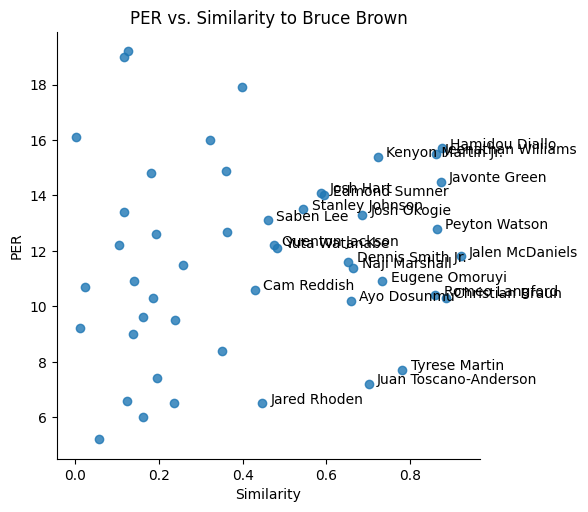

In [85]:
## Plot PER vs Similarity on a bar chart
%matplotlib inline

(
    sns.lmplot(
        data=subs,
        x='Similarity',
        y='PER',
        fit_reg = False,
        )
    .apply(lambda grid: [
        grid.ax.text(r['Similarity']+.02, r['PER'], r['label'])
        for r in subs.to_dict(orient='records')
    ])
    .set(title='PER vs. Similarity to Bruce Brown')
    .set_axis_labels('Similarity','PER')
    )

Kinda messy! Let's try it in plotly instead.

In [86]:
import plotly.express as px

fig = px.scatter(df, x='Similarity',y='PER', text='Player')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='PER vs. Similarity to Bruce Brown, Possibly Available Players'
)

fig.show()

Let's zoom in on the top right quadrant where you have high-ish similarity and higher PER:


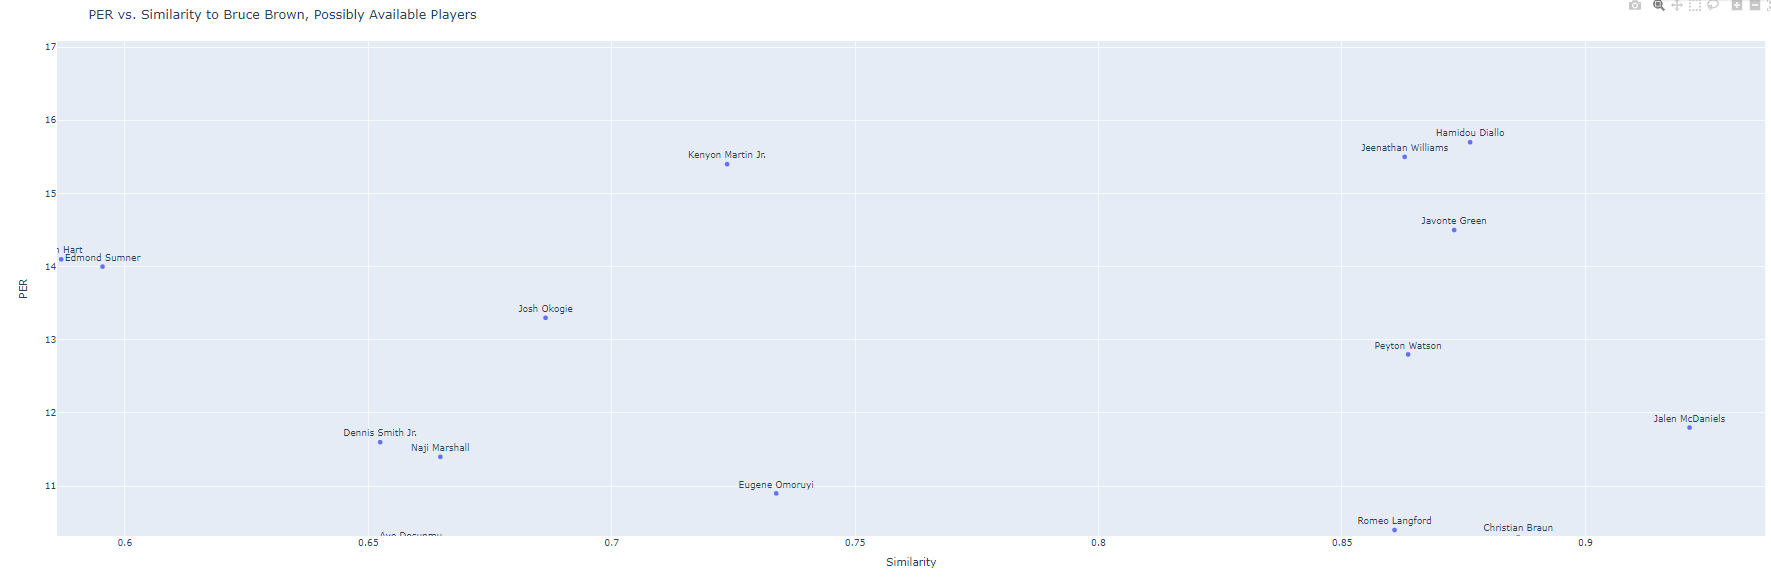


We see some great names sticking out that show similar levels of offensive efficiency (note that BB has a PER of 19, which is above average).

Some players have high similarity and similar PER:
* Hamidou Diallo
* Jeenathan Williams
* Javonte Green

While a few others have strong efficiency, but you make compromises on some aspects of PER:
* Shaq Harrison
* Kenyon Martin, Jr.

And some players are not yet showing the efficiency we'd expect from a Brown replacement but have enough similarity that maybe a new situation or slight tweaks could see their PER shoot up due to high similarity:
* Jalen McDaniels
* Peyton Watson

In [87]:
## Let's do the same visual, but add 2022-23 contract size as a size variable
fig = px.scatter(df, x='Similarity',y='PER', size = df.fillna(0)['2022-23'].tolist(), text='Player')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='PER vs. Similarity to Bruce Brown, Possibly Available Players'
)

fig.show()

In [88]:
## Let's view this in a table format
subs.fillna(0).loc[(subs['PER'] > 12) & (subs['Similarity'] > 0.6),['Player','Similarity','PER','2022-23','2023-24']]

,Player,Similarity,PER,2022-23,2023-24
27,Hamidou Diallo,0.876340,15.7,5200000,0
51,Josh Okogie,0.686434,13.3,1836090,0
70,Javonte Green,0.873065,14.5,1815677,0
86,Jeenathan Williams,0.862895,15.5,0,0
120,Kenyon Martin Jr.,0.723719,15.4,1782621,1930681
132,Peyton Watson,0.863600,12.8,2193960,2303520


And here's the bummer we've found -- we can't get a PER in the neighborhood of BB within a reasonable range of what he does well. This intuitively makes some sense (there's only 1 of every player) and shows the pickle the Nuggs are in.

In [89]:
## Let's do this also for VORP
fig = px.scatter(df, x='Similarity',y='VORP', size = df.fillna(0)['2022-23'].tolist(), text='Player')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='VORP vs. Similarity to Bruce Brown, Possibly Available Players'
)

fig.show()

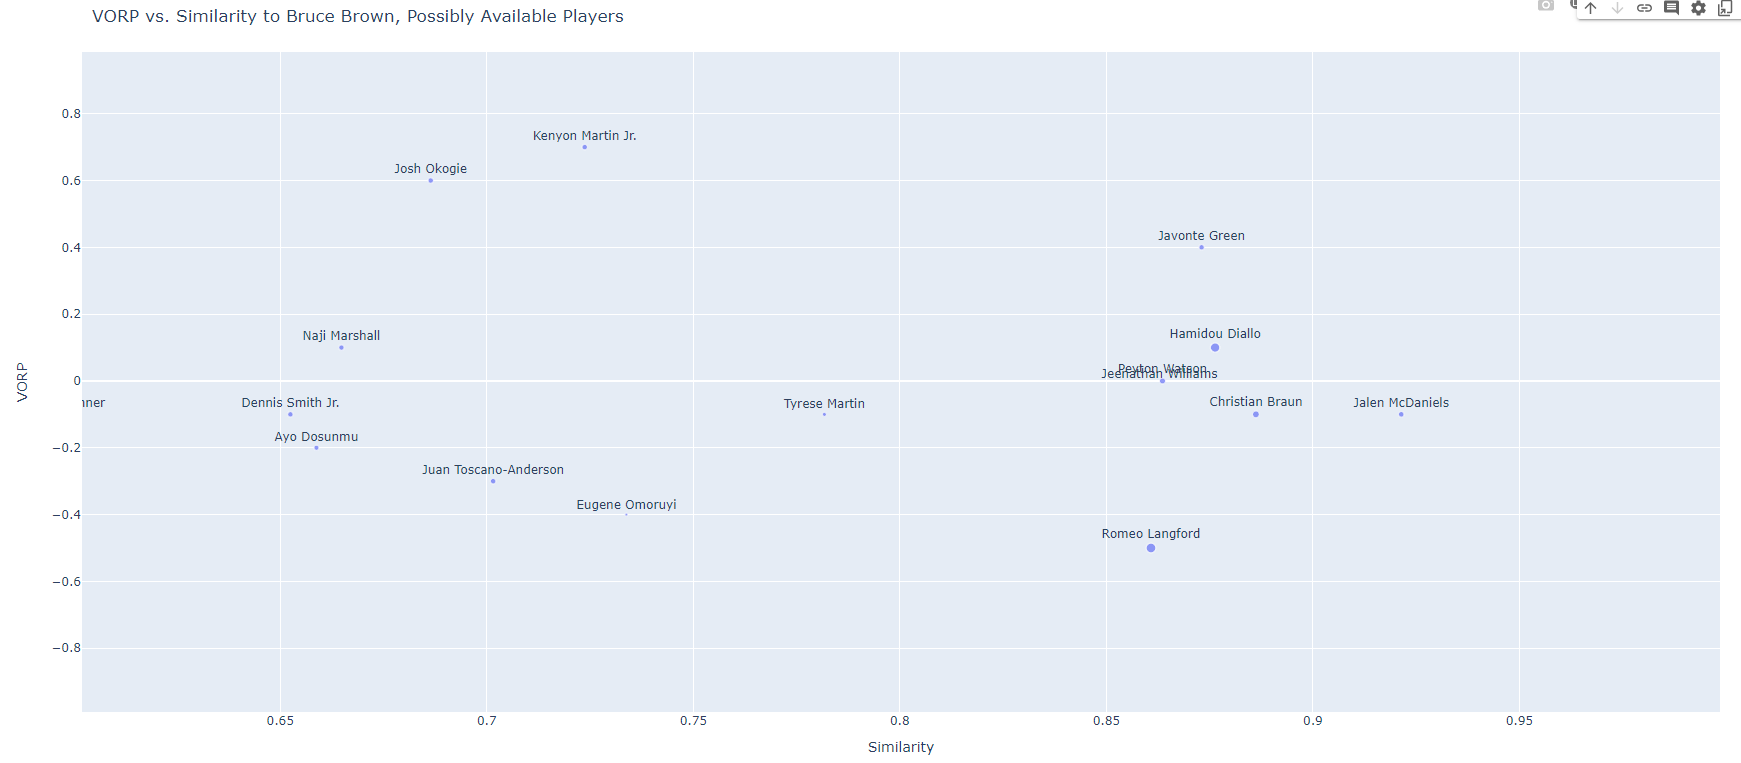

VORP tells a similar story -- BB bringing a 0.9 VORP off the bench with his usage rate makes it hard for equal-value players to be showcase similarly. We see some similar names here with high similarity and in-the-neighborhood VORPs:
* Javonte Green
* Hamidou Diallo

While we also see some better VORP but some compromises on role with:
* Kenyon Martin, Jr.
* Josh Okogie

In [90]:
## Finally, let's look at WS/48
fig = px.scatter(df, x='Similarity',y='WS/48', size = df.fillna(0)['2022-23'].tolist(), text='Player')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Win Shares per 48 mins vs. Similarity to Bruce Brown, Possibly Available Players'
)

fig.show()

(screenshot below)
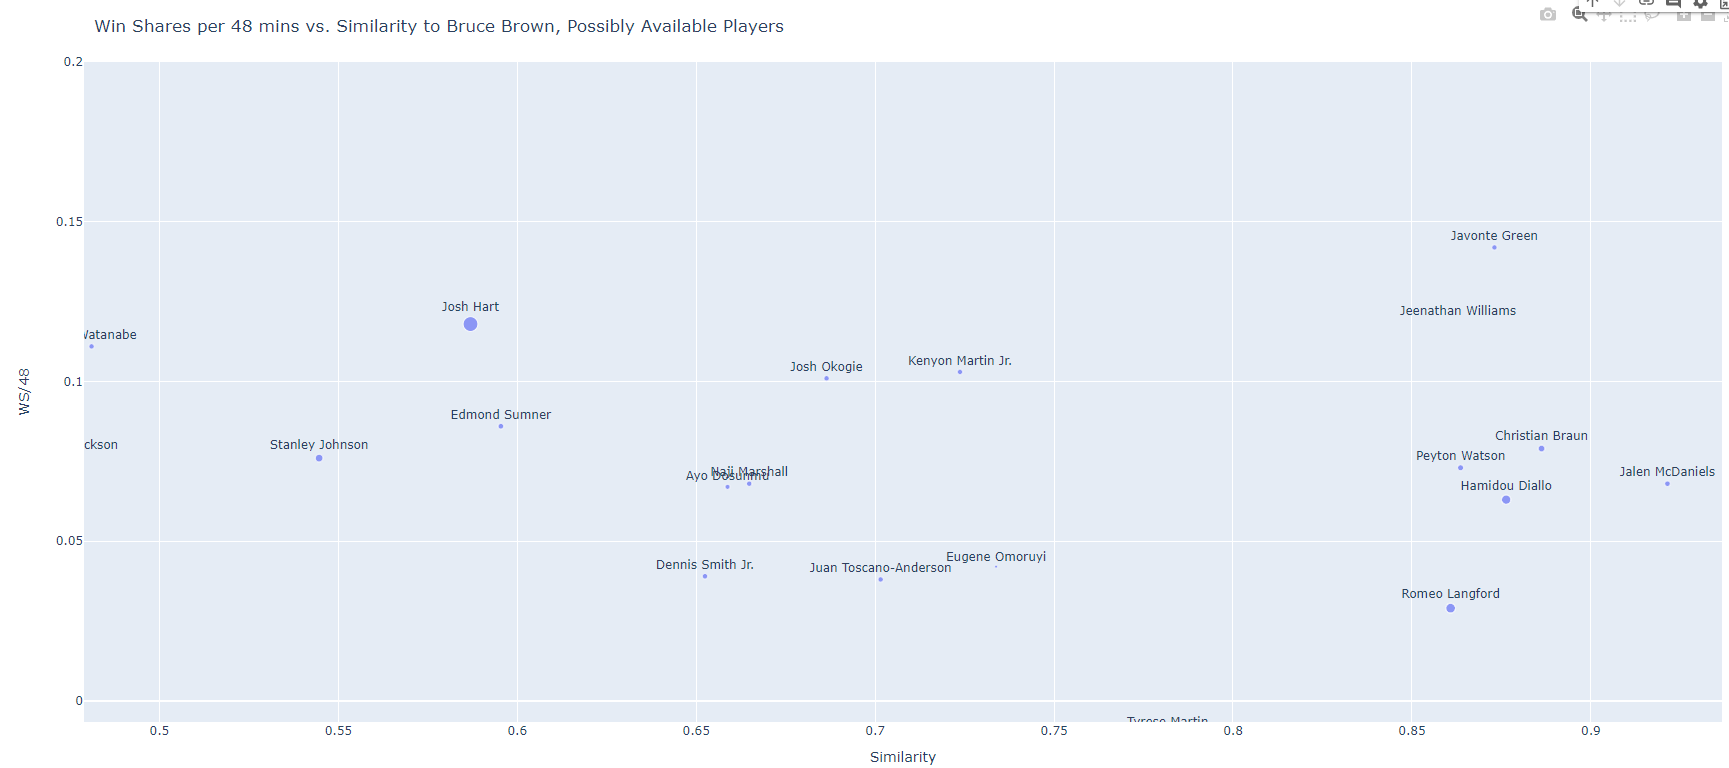

Win shares again shows the distinct impact BB brought to the Nuggs' second line (and later, in closeout lineups).

Brown brought 0.9 WS/48. The available market for win shares is not particularly significant. Best options here are:
* Javonte Green
* Jeenathan Williams
* Kenyon Martin, Jr.

We do see a clster of neutral WS players that include some existing players:
* Christian Braun
* Peyton Watson
* Hamidou Diallo
* Jalen McDaniels
* Romeo Langford

In [97]:
## Finally, let's look at some stats along key dimensions with these quality filters in place:
#### Shooting (TS%, 3PAr)
#### Defense (Steals, Blocks)
#### Playmaking (assists, turnovers)

## Start by filtering the dataset to these players we keep seeing to see what they bring
sim_matches = df.loc[df['Similarity'] > 0.6,:]

per_sims = sim_matches.loc[sim_matches['PER'] > 10,:]
vorp_sims = sim_matches.loc[sim_matches['VORP'] > 0,:]
ws_sims = sim_matches.loc[sim_matches['WS/48'] > 0,:]

## Merge and dedup
qualifiers = pd.concat([per_sims, vorp_sims, ws_sims])
qualifiers = qualifiers.drop_duplicates(subset='Player',keep='first')

qualifiers[['Player','PER','WS/48','VORP']].sort_values(by='PER',ascending=False)


,Player,PER,WS/48,VORP
27,Hamidou Diallo,15.7,0.063,0.1
86,Jeenathan Williams,15.5,0.120,0.0
120,Kenyon Martin Jr.,15.4,0.103,0.7
70,Javonte Green,14.5,0.142,0.4
51,Josh Okogie,13.3,0.101,0.6
132,Peyton Watson,12.8,0.073,0.0
41,Jalen McDaniels,11.8,0.068,-0.1
63,Dennis Smith Jr.,11.6,0.039,-0.1
119,Naji Marshall,11.4,0.068,0.1
90,Eugene Omoruyi,10.9,0.042,-0.4


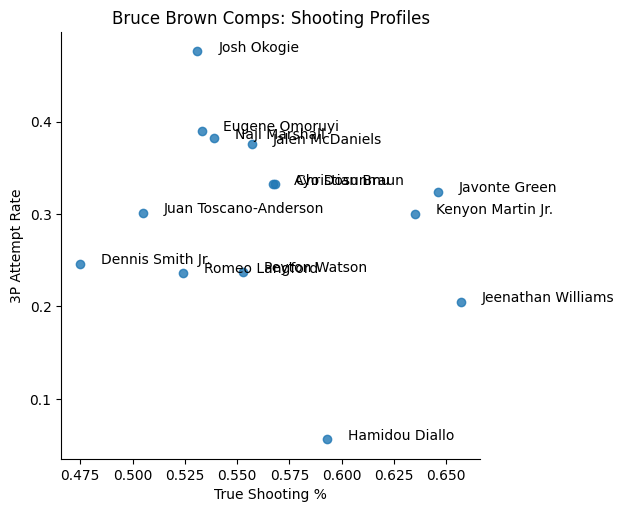

In [101]:
## Look at shooting profile first
%matplotlib inline

(
    sns.lmplot(
        data=qualifiers,
        x='TS%',
        y='3PAr',
        fit_reg = False,
        )
    .apply(lambda grid: [
        grid.ax.text(r['TS%']+.01, r['3PAr'], r['Player'])
        for r in qualifiers.to_dict(orient='records')
    ])
    .set(title='Bruce Brown Comps: Shooting Profiles')
    .set_axis_labels('True Shooting %','3P Attempt Rate')
    )

Based on this, we'll give favorable marks on shooting to Javonte Green and Kenton Martin Jr.

In [102]:
shooters = ['Javonte Green','Kenyon Martin Jr.']

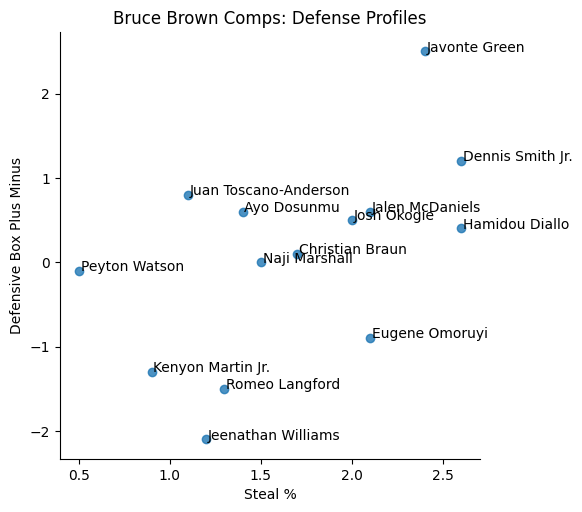

In [103]:
## Now look at defense, which is crucial here.
%matplotlib inline

(
    sns.lmplot(
        data=qualifiers,
        x='STL%',
        y='DBPM',
        fit_reg = False,
        )
    .apply(lambda grid: [
        grid.ax.text(r['STL%']+.01, r['DBPM'], r['Player'])
        for r in qualifiers.to_dict(orient='records')
    ])
    .set(title='Bruce Brown Comps: Defense Profiles')
    .set_axis_labels('Steal %','Defensive Box Plus Minus')
    )

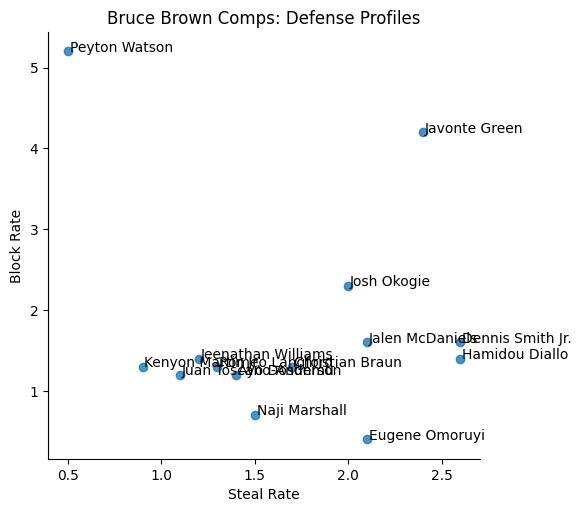

In [104]:
## Also add in block % for the tall boys
%matplotlib inline

(
    sns.lmplot(
        data=qualifiers,
        x='STL%',
        y='BLK%',
        fit_reg = False,
        )
    .apply(lambda grid: [
        grid.ax.text(r['STL%']+.01, r['BLK%'], r['Player'])
        for r in qualifiers.to_dict(orient='records')
    ])
    .set(title='Bruce Brown Comps: Defense Profiles')
    .set_axis_labels('Steal Rate','Block Rate')
    )

In [106]:
## Assign defense comps
defense = ['Javonte Green','Dennis Smith Jr.','Jalen McDaniels','Peyton Watson', 'Josh Okogie']

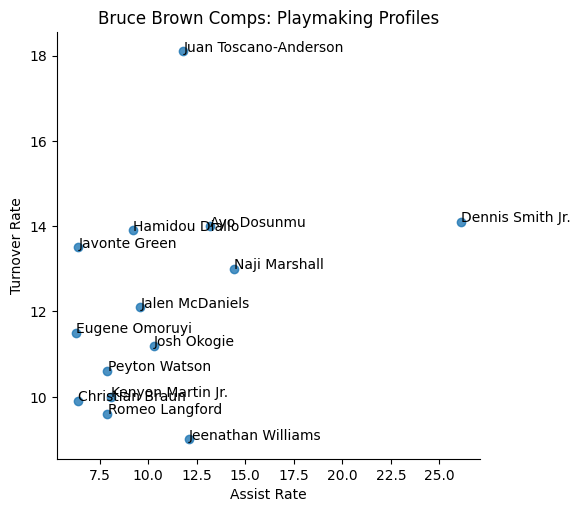

In [105]:
## Finally, playmaking
%matplotlib inline

(
    sns.lmplot(
        data=qualifiers,
        x='AST%',
        y='TOV%',
        fit_reg = False,
        )
    .apply(lambda grid: [
        grid.ax.text(r['AST%']+.01, r['TOV%'], r['Player'])
        for r in qualifiers.to_dict(orient='records')
    ])
    .set(title='Bruce Brown Comps: Playmaking Profiles')
    .set_axis_labels('Assist Rate','Turnover Rate')
    )

In [107]:
## Assign playmakers
playmakers = ['Dennis Smith Jr.','Jeenathan Williams']

In [129]:
## Build a final heatmap of comp players with attributes
comps = shooters + defense + playmakers
comps = list(dict.fromkeys(comps))
sht = map(lambda x: x in shooters, comps)
ds = map(lambda x: x in defense, comps)
pl = map(lambda x: x in playmakers, comps)

comp_df = pd.DataFrame({
    'Player': comps,
    'Shooting': list(sht),
    'Defense': list(ds),
    'Playmaking': list(pl)
})

comp_df

,Player,Shooting,Defense,Playmaking
0,Javonte Green,True,True,False
1,Kenyon Martin Jr.,True,False,False
2,Dennis Smith Jr.,False,True,True
3,Jalen McDaniels,False,True,False
4,Peyton Watson,False,True,False
5,Josh Okogie,False,True,False
6,Jeenathan Williams,False,False,True


[Text(0.5, 1.0, 'What Does Each Bruce Brown Comp Bring?')]

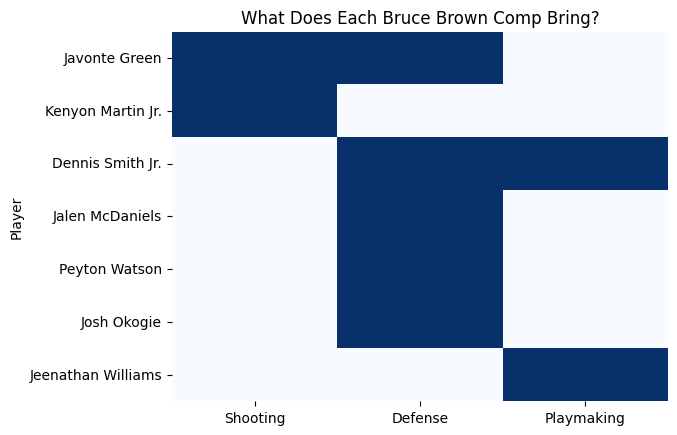

In [143]:
cc = comp_df.copy()
cc = cc.set_index('Player')

sns.heatmap(data=cc,
            cmap='Blues',
            cbar=False).set(
    title='What Does Each Bruce Brown Comp Bring?'
)